In [ ]:
import pandas as pd

# Create the dataset
data = pd.DataFrame({
    'Student ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Age': [18, 20, 17, 19, 21, 18, 22, 20, None, 19],
    'Score': [85, 92, 78, 95, None, 88, 72, 98, 80, 90]
})

# Display the dataset
print(data)


   Student ID  Gender   Age  Score
0           1    Male  18.0   85.0
1           2  Female  20.0   92.0
2           3    Male  17.0   78.0
3           4  Female  19.0   95.0
4           5    Male  21.0    NaN
5           6  Female  18.0   88.0
6           7    Male  22.0   72.0
7           8  Female  20.0   98.0
8           9    Male   NaN   80.0
9          10  Female  19.0   90.0


In [ ]:
data.isnull().sum()

Student ID    0
Gender        0
Age           1
Score         1
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
data

,Student ID,Gender,Age,Score
0,1,1,18.0,85.0
1,2,0,20.0,92.0
2,3,1,17.0,78.0
3,4,0,19.0,95.0
4,5,1,21.0,NaN
5,6,0,18.0,88.0
6,7,1,22.0,72.0
7,8,0,20.0,98.0
8,9,1,NaN,80.0
9,10,0,19.0,90.0


In [ ]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Student ID    0
Gender        0
Age           1
Score         1
dtype: int64


In [ ]:
# Deal with missing values by filling them with the mean value of the respective variable
data['Score'].fillna(data['Score'].mean(), inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)

In [ ]:
data

,Student ID,Gender,Age,Score
0,1,1,18.0,85.000000
1,2,0,20.0,92.000000
2,3,1,17.0,78.000000
3,4,0,19.0,95.000000
4,5,1,21.0,86.444444
5,6,0,18.0,88.000000
6,7,1,22.0,72.000000
7,8,0,20.0,98.000000
8,9,1,19.0,80.000000
9,10,0,19.0,90.000000


In [ ]:
data.isnull()

,Student ID,Gender,Age,Score
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [ ]:
data.isnull().sum()

Student ID    0
Gender        0
Age           0
Score         0
dtype: int64

In [ ]:
# Perform data validation on Age
data = data[(data['Age'] >= 16) & (data['Age'] <= 25)]

# Perform data validation on Score
data = data[(data['Score'] >= 0) & (data['Score'] <= 100)]

# Verify the updated dataset
print("Updated dataset:\n", data)

Updated dataset:
    Student ID  Gender   Age      Score
0           1       1  18.0  85.000000
1           2       0  20.0  92.000000
2           3       1  17.0  78.000000
3           4       0  19.0  95.000000
4           5       1  21.0  86.444444
5           6       0  18.0  88.000000
6           7       1  22.0  72.000000
7           8       0  20.0  98.000000
8           9       1  19.0  80.000000
9          10       0  19.0  90.000000


# OutLisers


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

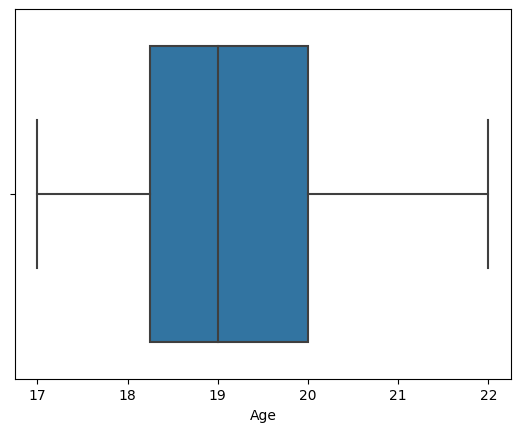

In [ ]:
# Identify outliers using box plots
sns.boxplot(x=data['Age'])
plt.show()

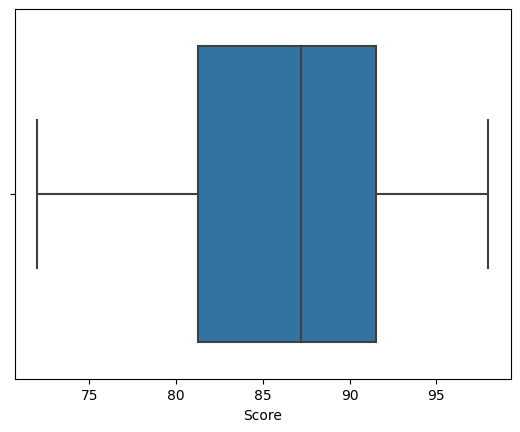

In [ ]:
sns.boxplot(x=data['Score'])
plt.show()


In [ ]:
# Calculate z-scores to detect outliers
z_scores_age = (data['Age'] - data['Age'].mean()) / data['Age'].std()
z_scores_score = (data['Score'] - data['Score'].mean()) / data['Score'].std()

In [ ]:
# Identify and remove outliers based on z-score threshold
z_score_threshold = 3
data = data[(z_scores_age.abs() < z_score_threshold) & (z_scores_score.abs() < z_score_threshold)]

# Verify the dataset without outliers
print("Dataset without outliers:\n", data)

Dataset without outliers:
    Student ID  Gender   Age      Score
0           1       1  18.0  85.000000
1           2       0  20.0  92.000000
2           3       1  17.0  78.000000
3           4       0  19.0  95.000000
4           5       1  21.0  86.444444
5           6       0  18.0  88.000000
6           7       1  22.0  72.000000
7           8       0  20.0  98.000000
8           9       1  19.0  80.000000
9          10       0  19.0  90.000000


In [ ]:
import numpy as np

In [ ]:
# Data Transformation:
# For the purpose of data transformation, let's consider transforming the 'Score' variable to decrease 
# skewness and achieve a more normal distribution. We can apply a logarithmic transformation.

In [ ]:
# Apply logarithmic transformation on 'Score' variable
data['Score'] = np.log(data['Score'])

# Verify the dataset with transformed variable
print("Dataset with transformed 'Score' variable:\n", data)

Dataset with transformed 'Score' variable:
    Student ID  Gender   Age     Score
0           1       1  18.0  4.442651
1           2       0  20.0  4.521789
2           3       1  17.0  4.356709
3           4       0  19.0  4.553877
4           5       1  21.0  4.459502
5           6       0  18.0  4.477337
6           7       1  22.0  4.276666
7           8       0  20.0  4.584967
8           9       1  19.0  4.382027
9          10       0  19.0  4.499810
